In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from pprint import pprint

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [5]:
#Loading Dataset
vino7 = pd.read_csv("vino7.csv")

In [6]:
vino7.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
# Examine balance or imbalance in target variable values
vino7.value_counts(['quality2'])

quality2
1           787
0           671
dtype: int64

In [8]:
# Splitting the dataset into the Training set and Test set into 80:20 ratio
X = vino7.drop(['quality2'], axis=1)
y = vino7['quality2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (1166, 11)
Shape of X_test:  (292, 11)


In [10]:
# Feature Scaling
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# Part II: Machine Learning Models

Models & Evaluation: LogisticRegression, Random Forest, Support Vector, GaussianNB, Xgboost

Model Comparison

Selecting & Tunning Model

Prediction Example

Conclusions

In [11]:
#Base Models at a glance
models = [LogisticRegression(),RandomForestClassifier(),SVC(kernel='rbf'), GaussianNB(), XGBClassifier()]
 
for i in range(5):
    models[i].fit(X_train_s, y_train)
 
    print(f'{models[i]} : ')
    print('Training ROC : ', metrics.roc_auc_score(y_train, models[i].predict(X_train_s)))
    print('Test ROC : ', metrics.roc_auc_score(y_test, models[i].predict(X_test_s)))
    print('Accuracy: ', metrics.accuracy_score(y_test, models[i].predict(X_test_s)))
    print()

LogisticRegression() : 
Training ROC :  0.7477706517374153
Test ROC :  0.7556405445711263
Accuracy:  0.7568493150684932



RandomForestClassifier() : 
Training ROC :  1.0
Test ROC :  0.8055515466397267
Accuracy:  0.8082191780821918

SVC() : 
Training ROC :  0.8048892117260765
Test ROC :  0.7759657478231587
Accuracy:  0.773972602739726

GaussianNB() : 
Training ROC :  0.7352744903503177
Test ROC :  0.7167941501900226
Accuracy:  0.7054794520547946

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None

Models: Closer Look

Model1 : Logistic Regression

In [12]:
model1 = LogisticRegression(random_state = 42)
model1.fit(X_train_s, y_train)
predictions1 = model1.predict(X_test_s)

In [13]:
c_matrix = metrics.confusion_matrix(y_test, predictions1)
c_matrix

array([[ 92,  31],
       [ 40, 129]], dtype=int64)

In [14]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       123
           1       0.81      0.76      0.78       169

    accuracy                           0.76       292
   macro avg       0.75      0.76      0.75       292
weighted avg       0.76      0.76      0.76       292



In [15]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions1, pos_label=1)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, predictions1))

roc_auc_score for Logistic Regression:  0.7556405445711263


Model 2: Random Forest

In [16]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_s, y_train)
predictions2 = model2.predict(X_test_s)

In [17]:
c_matrix2 = metrics.confusion_matrix(y_test, predictions2)
c_matrix2

array([[ 95,  28],
       [ 29, 140]], dtype=int64)

In [18]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       123
           1       0.83      0.83      0.83       169

    accuracy                           0.80       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.80      0.80       292



In [19]:
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions2, pos_label=1)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, predictions2))

roc_auc_score for Random Forest:  0.8003800452205705


Model 3 :Support Vector Machine (SVM)

In [20]:
model3 = SVC(random_state=42)
model3.fit(X_train_s, y_train)
predictions3 = model3.predict(X_test_s)

In [21]:
c_matrix3 = metrics.confusion_matrix(y_test, predictions2)
c_matrix3

array([[ 95,  28],
       [ 29, 140]], dtype=int64)

In [22]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       123
           1       0.83      0.76      0.80       169

    accuracy                           0.77       292
   macro avg       0.77      0.78      0.77       292
weighted avg       0.78      0.77      0.78       292



In [23]:
fpr3, tpr3, thresh3 = roc_curve(y_test, predictions3, pos_label=1)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, predictions3))

roc_auc_score for SVM:  0.7759657478231587


Model 4:Naive Bayes

In [24]:
model4 = GaussianNB()
model4.fit(X_train_s, y_train)
predictions4 = model4.predict(X_test_s)

In [25]:
c_matrix4 = metrics.confusion_matrix(y_test, predictions4)
c_matrix4

array([[ 97,  26],
       [ 60, 109]], dtype=int64)

In [26]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69       123
           1       0.81      0.64      0.72       169

    accuracy                           0.71       292
   macro avg       0.71      0.72      0.70       292
weighted avg       0.73      0.71      0.71       292



In [27]:
fpr4, tpr4, thresh4 = roc_curve(y_test, predictions4, pos_label=1)
print('roc_auc_score for GaussianNB : ', roc_auc_score(y_test, predictions4))

roc_auc_score for GaussianNB :  0.7167941501900226


Model 5: Xgboost

In [28]:
model5 = XGBClassifier(random_state = 42)
model5.fit(X_train_s, y_train)
predictions5 = model5.predict(X_test_s)


In [29]:
c_matrix5 = metrics.confusion_matrix(y_test, predictions5)
c_matrix5

array([[ 92,  31],
       [ 34, 135]], dtype=int64)

In [30]:
print(classification_report(y_test,predictions5))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       123
           1       0.81      0.80      0.81       169

    accuracy                           0.78       292
   macro avg       0.77      0.77      0.77       292
weighted avg       0.78      0.78      0.78       292



In [31]:
fpr5, tpr5, thresh5 = roc_curve(y_test, predictions5, pos_label=1)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, predictions5))

roc_auc_score for XGBoost:  0.7733920238610671


Model Comparison

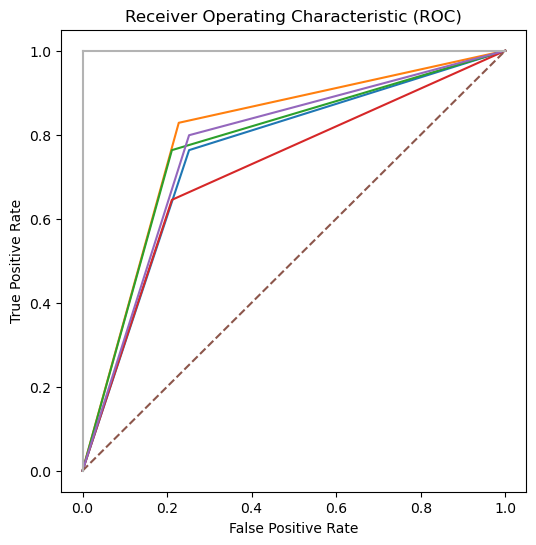

In [32]:
    plt.subplots(1, figsize=(6,6))
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr1, tpr1,fpr2, tpr2,fpr3, tpr3, fpr4, tpr4, fpr5, tpr5)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [33]:
# ROC AUC score compares the relation between True Positive and False Positive rate in other words how efficient the model is 
# while accuracy is the percentage of correct predictions "Accuracy from confusion matrix is ", (TN+TP)/Total)

In [34]:
results = pd.DataFrame(columns=['Model','Accuracy','ROC'])

In [35]:
results.loc[len(results)]=['Logistic Regression', accuracy_score(y_test,predictions1),roc_auc_score(y_test, predictions1)]
results.loc[len(results)]=['Random Forest', accuracy_score(y_test,predictions2),roc_auc_score(y_test, predictions2)]
results.loc[len(results)]=['Support Vector', accuracy_score(y_test,predictions3),roc_auc_score(y_test, predictions3)]
results.loc[len(results)]=['Naive Bayes', accuracy_score(y_test,predictions4),roc_auc_score(y_test, predictions4)]
results.loc[len(results)]=['XG Boost', accuracy_score(y_test,predictions5),roc_auc_score(y_test, predictions5)]
print(results)

                 Model  Accuracy       ROC
0  Logistic Regression  0.756849  0.755641
1        Random Forest  0.804795  0.800380
2       Support Vector  0.773973  0.775966
3          Naive Bayes  0.705479  0.716794
4             XG Boost  0.777397  0.773392


In [36]:
# Conclusion:RandomForest model had the higher Accuracy and ROC score. In the next steps this model will be tunned to get 
# the highest possible performance rate.

Tunning RandomForest Model

In [37]:
model2.feature_importances_

array([0.06538684, 0.1012624 , 0.06796961, 0.06123055, 0.08006011,
       0.055612  , 0.10691361, 0.08072254, 0.0620494 , 0.13642597,
       0.18236698])

In [38]:
importances = model2.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = vino7.columns[1:]
 
for f in range(X_train_s.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) quality2                       0.182367
 2) alcohol                        0.136426
 3) density                        0.106914
 4) citric acid                    0.101262
 5) pH                             0.080723
 6) free sulfur dioxide            0.080060
 7) residual sugar                 0.067970
 8) volatile acidity               0.065387
 9) sulphates                      0.062049
10) chlorides                      0.061231
11) total sulfur dioxide           0.055612


In [39]:
# Splitting and removing features
X2 = vino7.drop(['quality2','sulphates','total sulfur dioxide','chlorides','residual sugar'], axis=1)
y2 = vino7['quality2']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)


In [40]:
sc2 = StandardScaler()
X_train_s2 = sc.fit_transform(X_train2)
X_test_s2 = sc.transform(X_test2)

In [41]:
model22 = RandomForestClassifier(random_state=42)
model22.fit(X_train_s2, y_train2)
predictions22 = model22.predict(X_test_s2)

In [42]:
print(classification_report(y_test,predictions22))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       123
           1       0.82      0.78      0.80       169

    accuracy                           0.78       292
   macro avg       0.77      0.78      0.77       292
weighted avg       0.78      0.78      0.78       292



In [43]:
# Accuracy did not improved after removing some of the features. In the next steps parameters will be tune.

In [44]:
#Current parameters
print('Parameters currently in use:\n')
pprint(model2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [45]:
#Tunning parameters
model2B = RandomForestClassifier(n_estimators=400, max_features='log2', min_samples_leaf=4, min_samples_split=8, max_depth=13, random_state=42)
model2B.fit(X_train_s, y_train)
predictions2B = model2B.predict(X_test_s)

In [46]:
print(classification_report(y_test,predictions2B))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       123
           1       0.84      0.83      0.83       169

    accuracy                           0.81       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.81      0.81      0.81       292



In [47]:
fpr2B, tpr2B, thresh2B = roc_curve(y_test, predictions2B, pos_label=1)
print('roc_auc_score for Improved RandomForest: ', roc_auc_score(y_test, predictions2B))

roc_auc_score for Improved RandomForest:  0.8044450858709771


In [48]:
#After modifying parameters accuracy  and ROC improved from 80 to 81.

In [49]:
c_matrix2B = metrics.confusion_matrix(y_test, predictions2B)
c_matrix2B

array([[ 96,  27],
       [ 29, 140]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

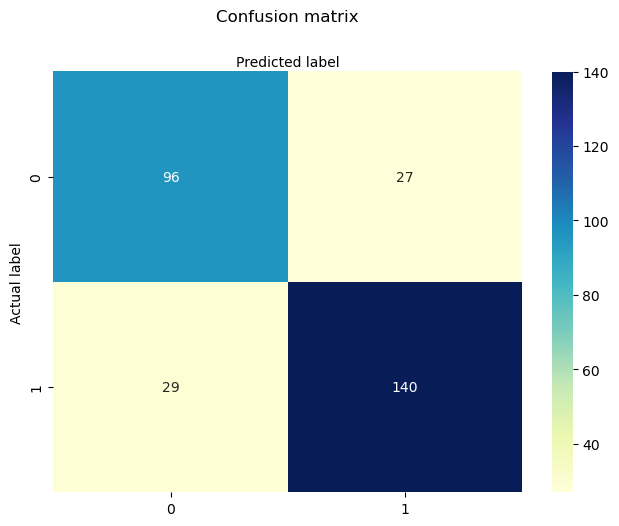

In [50]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(c_matrix2B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

RandomForest GridSearchCV & RandomizedSearchCV

In [51]:
#GridSearchCV
forest_params = [{'max_depth': list(range(3, 15)), 'max_features':(['sqrt', 'log2', None]), 'min_samples_leaf':(3, 4, 6), 'min_samples_split':(4,6,8,10)}]
model = GridSearchCV(model2, forest_params, cv=10, scoring='accuracy')
#model.fit(X_train_s, y_train)


In [52]:
print(model.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#RandomizedSearchCV
forest_params = [{'max_depth': list(range(3, 15)), 'max_features':(['sqrt', 'log2', None]), 'min_samples_leaf':(3, 4, 6), 'min_samples_split':(4,6,8,10)}]
modelB = RandomizedSearchCV(model2, forest_params, cv=10, scoring='accuracy')
#modelB.fit(X_train_s, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=7,
                                                    n_estimators=200,
                                                    random_state=42),
                   param_distributions=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                       11, 12, 13, 14],
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': (3, 4, 6),
                                         'min_samples_split': (4, 6, 8, 10)}],
                   scoring='accuracy')

In [ ]:
print(modelB.best_params_)

{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 11}


In [ ]:
#Choosing between RandomizedSearchCV and GridSearchCV output
param_dist = {"max_depth": [11, 13],
              "max_features":['log2', None],
              "min_samples_split":[4,8],
              "min_samples_leaf":[4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
samples = 5  # number of random samples 
randomCV = RandomizedSearchCV(model2B, param_distributions=param_dist, n_iter=samples,cv=10)

In [ ]:
#randomCV.fit(X_train_s, y_train)
print(randomCV.best_params_)

{'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 13, 'criterion': 'gini', 'bootstrap': False}


Prediction Example

In [53]:
X_test.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1320,7.6,0.49,0.33,1.9,0.074,27.0,85.0,0.99706,3.41,0.58,9.0


In [54]:
X_test.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:

input_data2 = (7.4,0.7,1.9,4,.074,27,85,0.9978,3.51,0.56,9.4)

input_data_as_numpy_array = np.asarray(input_data2)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2B.predict(input_data_reshaped)
print (prediction)

if (prediction[0]==1):
    print('Good Wine')
else:
    print('Bad quality wine')

[1]
Good Wine


Saving the improved RandomForest model

In [ ]:
import pickle
filename = 'savemodel.sav'
pickle.dump(model2B, open(filename, 'wb'))

In [ ]:
load_model =pickle.load(open(filename, 'rb'))

In [ ]:
load_model.predict([[7.4,0.7,1.9,4,.074,27,85,0.9978,3.51,0.56,9.4]])

array([1], dtype=int64)

# Part III: Conclusions

In [ ]:
#After the analysis of the available dataset for  wine quality and the exploration of different machine learning supervised
#models is concluded that the best model to predict wine quality is the Random Forest Classifier. 
#Using RandomForestClassifier model for predict wine quality yielded and accuracy score of 81% , F1 score of 83%, ROC_AUC score of 80%.